# Hyperparameters of MaPAL

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import required packages
import sys
sys.path.append('../../')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.utils.statistic_functions import read_results, compute_aulc_ranks, extract_execution_times, compute_statistics
from src.utils.data_functions import investigate_data_set
from src.utils.plot_functions import plot_aulc_ranks, plot_learning_curves, create_latex_table

from matplotlib import rc
#rc('text', usetex=True)
#rc('font', family='serif')
rc('axes', edgecolor="black")

If you have conducted all experiments on the toy data set according to the description in the README, you can simply execute the cells below.

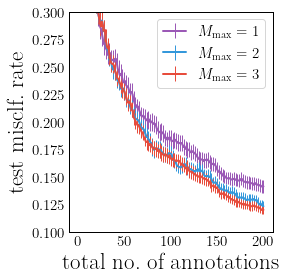

In [11]:
budget = 200.0
test_ratio = 0.8
fontsize = 23
n_repeats = 100
n_annotators = 4
dir_learning = '../../results/simulated-x/learning-curves/simulated-x'
abs_path = '../../results/simulated-x/csvs'
filename_list = ['mapal-1-0.0001-1-1-entropy', 'mapal-1-0.0001-2-1-entropy', 'mapal-1-0.0001-3-1-entropy']
strategy_df = {
               'name': [r'$M_{\mathrm{max}}=1$', r'$M_{\mathrm{max}}=2$', r'$M_{\mathrm{max}}=3$'],
               'color': ['#9b59b6', '#3498db', '#e74c3c'],
               'line': ['-', '-', '-']
              }
strategy_df = pd.DataFrame(strategy_df, index=filename_list)
results_dict = read_results(abs_path=abs_path, data_set_names=['large-example-data-set-x'], 
                            strategy_names=strategy_df.index.values, budget=budget, test_ratio=test_ratio, n_annotators=n_annotators)
plt.figure(figsize=(4, 4))
for d in results_dict.keys():
    for q in results_dict[d].keys():
            stats_dict = pd.DataFrame(compute_statistics(results_dict[d][q]))
            x = np.arange(0, budget+1)
            y = stats_dict['test-misclf-rate-mean'].values
            err = stats_dict['test-misclf-rate-std'].values
            plt.errorbar(x=x, y=y, yerr=err/np.sqrt(n_repeats), errorevery=2, color=strategy_df.loc[q]['color'],
                         label=strategy_df.loc[q]['name'], ls=strategy_df.loc[q]['line'], lw=2, elinewidth=1)
plt.xlabel('total no.~of annotations', color='black', fontsize=fontsize)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('test misclf.~rate', color='black', fontsize=fontsize)
plt.ylim(0.1, 0.3)
plt.legend(prop={'size': 15}, handlelength=1.5)
plt.tight_layout()
plt.savefig('../../plots/M-study.pdf')

[0.5, 1.5, 2.5, 3.5]


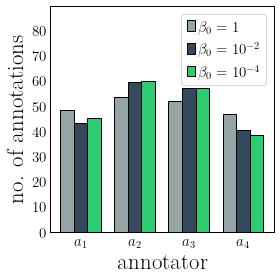

In [10]:
budget = 200.0
test_ratio = 0.8
fontsize = 23
n_annotators = 4
dir_learning = '../../results/simulated-x/learning-curves/simulated-x'
abs_path = '../../results/simulated-x/csvs'
filename_list = ['mapal-1-1.0-2-1-entropy', 'mapal-1-0.01-2-1-entropy', 'mapal-1-0.0001-2-1-entropy']
strategy_df = {
               'name': [r'$\beta_0=1$', r'$\beta_0=10^{-2}$', r'$\beta_0=10^{-4}$'],
               'color': ['#95a5a6', '#34495e', '#2ecc71'],
               'line': ['-', '--', ':']
              }
strategy_df = pd.DataFrame(strategy_df, index=filename_list)
results_dict = read_results(abs_path=abs_path, data_set_names=['large-example-data-set-x'], 
                            strategy_names=strategy_df.index.values, budget=budget, test_ratio=test_ratio, n_annotators=n_annotators)
Y_true = []
Y_false = []
E_true = []
E_false = []
n_queries = 200
plt.figure(figsize=(4, 4))
for d in results_dict.keys():
    for q in results_dict[d].keys():
            stats_dict = pd.DataFrame(compute_statistics(results_dict[d][q]))
            Y_true.append([stats_dict['n-true-labels-{}-mean'.format(a)].values[n_queries] for a in range(n_annotators)])
            Y_false.append([stats_dict['n-false-labels-{}-mean'.format(a)].values[n_queries] for a in range(n_annotators)])
            E_true.append([stats_dict['n-true-labels-{}-std'.format(a)].values[n_queries] for a in range(n_annotators)])
            E_false.append([stats_dict['n-false-labels-{}-std'.format(a)].values[n_queries] for a in range(n_annotators)])
Y_true = np.array(Y_true)
Y_false = np.array(Y_false)
E_true = np.array(Y_true)
E_false = np.array(Y_false)

barwidth = 0.25
r1 = np.arange(n_annotators)
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
print(r3)
plt.bar(x=r1, height=Y_true[0]+Y_false[0], width=barwidth, color=strategy_df.loc[filename_list[0]]['color'], label=strategy_df.loc[filename_list[0]]['name'], edgecolor='black')
plt.bar(x=r2, height=Y_true[1]+Y_false[1], width=barwidth, color=strategy_df.loc[filename_list[1]]['color'], label=strategy_df.loc[filename_list[1]]['name'], edgecolor='black')
plt.bar(x=r3, height=Y_true[2]+Y_false[2], width=barwidth, color=strategy_df.loc[filename_list[2]]['color'], label=strategy_df.loc[filename_list[2]]['name'], edgecolor='black')
plt.xticks([r + barwidth for r in range(n_annotators)], [r'$a_{}$'.format(a) for a in range(1, n_annotators+1)], fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('annotator', color='black', fontsize=fontsize)
plt.ylabel('no. of annotations', color='black', fontsize=fontsize)
plt.ylim(0, 1.5 * np.max(np.array(Y_true) + np.array(Y_false)))
lgd = plt.legend(prop={'size': 15}, handlelength=0.5, handletextpad=0.2, columnspacing=0.5, loc='upper right')
lgd = plt.legend(prop={'size': 15}, handlelength=0.5, handletextpad=0.2, columnspacing=0.5, loc='upper right')
#add_patch(lgd)
plt.tight_layout()
plt.savefig('../../plots/beta-study.pdf')